In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

## Lecture 09: Statistics##

In [2]:
united = Table.read_table('united_summer2015.csv')
united = united.with_column('Row', np.arange(united.num_rows)).move_to_start('Row')

In [3]:
united

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


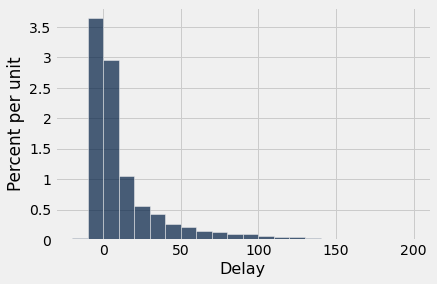

In [4]:
united.hist('Delay', bins = np.arange(-20, 201, 10))

## Simulating a Statistic ##

In [5]:
np.median(united.column('Delay'))

2.0

In [6]:
np.median(united.sample(10).column('Delay'))

-1.0

In [7]:
medians = make_array()

for i in np.arange(10000):
    new_median = np.median(united.sample(1000).column('Delay'))
    medians = np.append(medians, new_median)

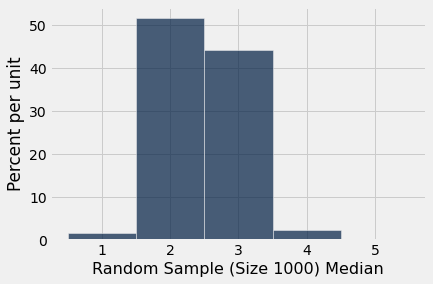

In [8]:
Table().with_column('Random Sample (Size 1000) Median', medians).hist(bins = np.arange(0.5, 5.6, 1))

## Swain vs. Alabama ##

In [ ]:
eligible_population = make_array(0.26, 0.74)
eligible_population

In [ ]:
sample_proportions(100, eligible_population)

In [ ]:
# statistic: number of black men among random sample of 100 men from eligible population

100 * sample_proportions(100, eligible_population).item(0)

In [ ]:
# Simulation

counts = make_array()

for i in np.arange(10000):
    new_count = 100 * sample_proportions(100, eligible_population).item(0)
    counts = np.append(counts, new_count)

In [ ]:
counts

In [ ]:
# Visualization

Table().with_column('Random Sample Count', counts).hist(bins = np.arange(9.5, 45, 1))

observed_count = 8
plots.scatter(observed_count, 0, color='red', s=30);

## Mendel and Pea Flowers ##

In [ ]:
model = make_array(0.75, 0.25)

In [ ]:
sample_proportions(929, model)

In [ ]:
# statistic: distance between sample percent (of purple plants) and 75

abs(100 * sample_proportions(929, model).item(0) - 75)

In [ ]:
# Simulation

distances = make_array()

for i in np.arange(10000):
    new_distance = abs(100 * sample_proportions(929, model).item(0) - 75)
    distances = np.append(distances, new_distance)

In [ ]:
Table().with_column('Distance from 75%', distances).hist()

In [ ]:
observed_distance =  abs(100*(705/929) - 75)
observed_distance

In [ ]:
Table().with_column('Distance from 75%', distances).hist()
plots.scatter(observed_distance, 0, color='red', s=30);